In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

d:\Sem_VIII\FDS\LAB\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.12.0'

In [4]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Global Constants
IMG_CMAP = "gray_r"
IMG_HEIGHT = 28
IMG_WIDTH = 28
EPOCHS = 15
BATCH_SIZE=64
INPUT_SHAPE= (IMG_WIDTH, IMG_HEIGHT)

### Load MNIST datatset

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

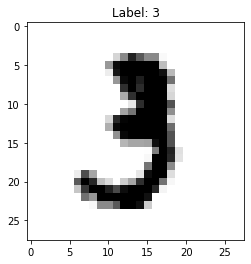

In [8]:
# pick an image to plot
index = 10
image = X_train[index]
title = f"Label: {Y_train[index]}"
# plot the index
fig = plt.figure
plt.imshow(image, cmap=IMG_CMAP)
plt.title(title)
plt.show()

In [9]:
num = 10000
x_train_images = X_train[:num]
y_train_labels = Y_train[:num]


test_images = X_test[:num]
test_labels = Y_test[:num]

### Plot the images

In [1]:
def plot_images(images,labels,img_cmap,num_col, num_row = 1):

    num = len(images)
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap=img_cmap)
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

plot_images(x_train_images[:10],y_train_labels[:10], IMG_CMAP,5,2)

NameError: name 'x_train_images' is not defined

In [11]:
print(X_train.shape)

(60000, 28, 28)


## Normalizing the images

In [12]:
# Normalize the images
x_train_normalized = X_train.astype('float32') / 255.0
x_test_normalized = X_test.astype('float32') / 255.0

# Reshape the images
x_train_normalized = np.expand_dims(x_train_normalized, axis=-1)
x_test_normalized = np.expand_dims(x_test_normalized, axis=-1)

In [13]:
print(x_train_normalized.shape)

(60000, 28, 28, 1)


### Define Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [15]:
model = Sequential()

### Define Layers

In [16]:
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [18]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train_normalized, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.7809 - accuracy: 0.8141
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3449 - accuracy: 0.9039
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2904 - accuracy: 0.9181
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2585 - accuracy: 0.9268
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2346 - accuracy: 0.9332
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2150 - accuracy: 0.9390
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1984 - accuracy: 0.9433
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1843 - accuracy: 0.9471
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1718 - accuracy: 0.9509
Epoch 10/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1603 - accuracy: 0.9542

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [21]:
score = model.evaluate(x_test_normalized, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.1263793408870697
Test accuracy: 0.9638000130653381


In [22]:
# save model and its architecture 
model.save('modelv1.h5')

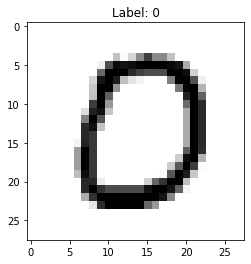

In [22]:
# Plot the test image
image = X_test[index]
title = f"Label: {Y_test[index]}"
# plot the index
fig = plt.figure
plt.imshow(image, cmap=IMG_CMAP)
plt.title(title)
plt.show()

1/1 [==============================] - 0s 84ms/step


Text(0.5, 1.0, 'Label: 5')

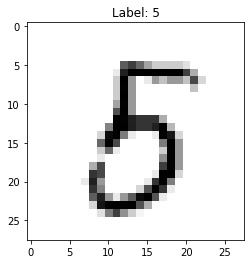

In [26]:
index = 45
# print(x_test_normalized[index].shape)
# model.predict(x_test_normalized[index])

to_predict = np.array([X_test[index]])
output = model.predict(to_predict)
pixels = to_predict[0].reshape((28, 28))
title = f"Label: {Y_test[index]}"
plt.imshow(pixels, cmap=IMG_CMAP)
plt.title(title)


In [27]:
result = np.argmax(output)
print(f"The Expected result is {title}")
print(f"The Predicted digit is {result}")

The Expected result is Label: 5
The Predicted digit is 5
